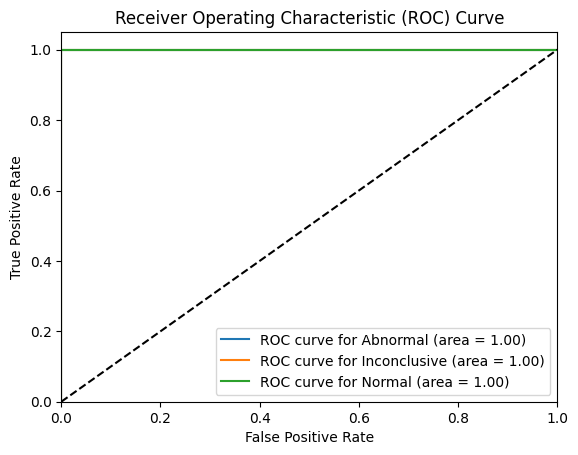

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')

# Define the features and target variable
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 'Name', 'Date of Admission', 'Discharge Date'])
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=['Abnormal', 'Inconclusive', 'Normal'])
n_classes = y_test_bin.shape[1]

# Train a Random Forest model (you can replace this with other models)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i, class_name in enumerate(['Abnormal', 'Inconclusive', 'Normal']):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {class_name} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\bharg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


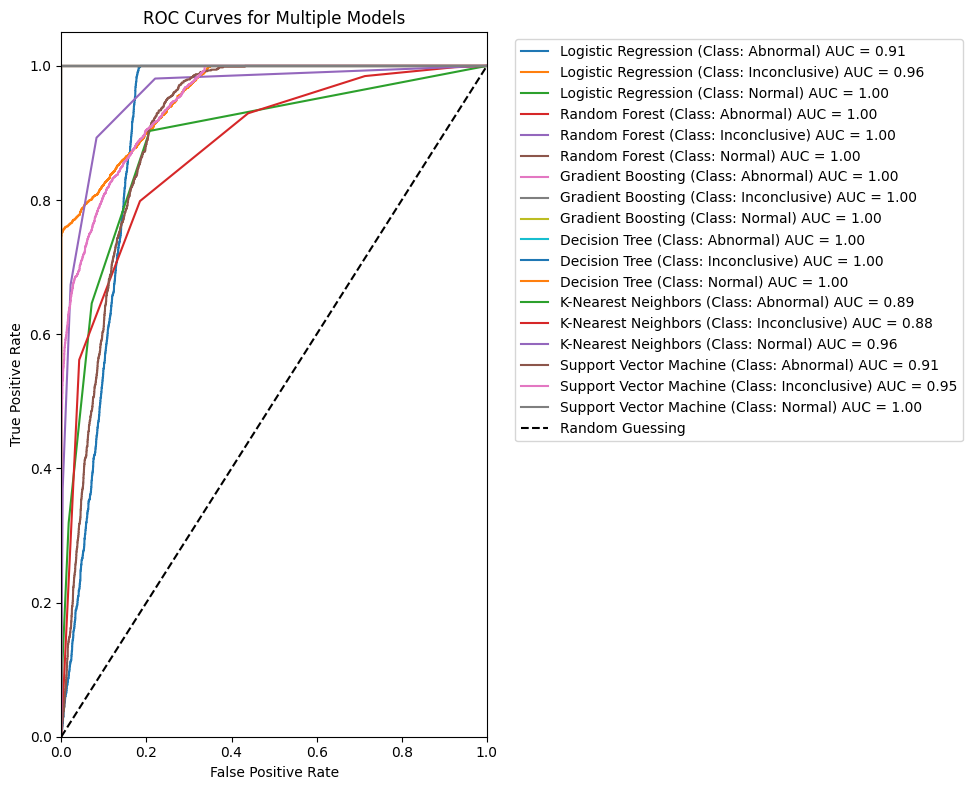

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('Cleaned_healthcare_dataset.csv')
X = data.drop(columns=['Test Results_0', 'Test Results_1', 'Test Results_2', 'Name', 'Date of Admission', 'Discharge Date'])
y = data[['Test Results_0', 'Test Results_1', 'Test Results_2']].idxmax(axis=1)
y = y.map({'Test Results_0': 'Normal', 'Test Results_1': 'Abnormal', 'Test Results_2': 'Inconclusive'})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize the test labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=['Abnormal', 'Inconclusive', 'Normal'])
n_classes = y_test_bin.shape[1]

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:  # For models like SVM without predict_proba, use decision_function
        y_pred_prob = model.decision_function(X_test)
    
    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        if y_pred_prob.ndim == 1 or y_pred_prob.shape[1] == 1:  # Check if probabilities are binary or multi-class
            y_score = y_pred_prob
        else:
            y_score = y_pred_prob[:, i]
        
        # Ensure using the test binarized labels only
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot the ROC curve for each class
    for i, class_name in enumerate(['Abnormal', 'Inconclusive', 'Normal']):
        plt.plot(fpr[i], tpr[i], label=f'{model_name} (Class: {class_name}) AUC = {roc_auc[i]:.2f}')
        
# Plot the ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
